Задание 1:
1. Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;
2. Сделать базовый анализ целевой переменной, сделать выводы;
3. Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы;
4. Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;
5. Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?
6. Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.
7. Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.

Ссылка на наборы данных: https://drive.google.com/file/d/1j8zuKbI-PW5qKwhybP4S0EtugbPqmeyX/view?usp=sharing

p.s. это обязательная программа для выполнения домашки, вы можете расширить эту программу и сделать больше; я только за :)

In [4]:
from typing import List, Optional
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as st
from scipy.stats import probplot, ks_2samp

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
import missingno as msno
import xgboost as xgb
%matplotlib inline

In [5]:
train = pd.read_csv("data_dz/train.csv")
test = pd.read_csv("data_dz/test.csv")

print("train.shape = {} rows, {} cols".format(*train.shape))
print("test.shape = {} rows, {} cols".format(*test.shape))

train.shape = 200000 rows, 202 cols
test.shape = 200000 rows, 201 cols


In [6]:
pd.set_option('display.max_columns', 210)

#### 1. Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;

In [7]:
train.describe(include='all')

ID_code         target          var_0          var_1  \
count        200000  200000.000000  200000.000000  200000.000000   
unique       200000            NaN            NaN            NaN   
top     train_22167            NaN            NaN            NaN   
freq              1            NaN            NaN            NaN   
mean            NaN       0.100490      10.679914      -1.627622   
std             NaN       0.300653       3.040051       4.050044   
min             NaN       0.000000       0.408400     -15.043400   
25%             NaN       0.000000       8.453850      -4.740025   
50%             NaN       0.000000      10.524750      -1.608050   
75%             NaN       0.000000      12.758200       1.358625   
max             NaN       1.000000      20.315000      10.376800   

                var_2          var_3          var_4          var_5  \
count   200000.000000  200000.000000  200000.000000  200000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        10.715192       6.796529      11.078333      -5.065317   
std          2.640894       2.043319       1.623150       7.863267   
min          2.117100      -0.040200       5.074800     -32.562600   
25%          8.722475       5.254075       9.883175     -11.200350   
50%         10.580000       6.825000      11.108250      -4.833150   
75%         12.516700       8.324100      12.261125       0.924800   
max         19.353000      13.188300      16.671400      17.251600   

                var_6          var_7          var_8          var_9  \
count   200000.000000  200000.000000  200000.000000  200000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         5.408949      16.545850       0.284162       7.567236   
std          0.866607       3.418076       3.332634       1.235070   
min          2.347300       5.349700     -10.505500       3.970500   
25%          4.767700      13.943800      -2.317800       6.618800   
50%          5.385100      16.456800       0.393700       7.629600   
75%          6.003000      19.102900       2.937900       8.584425   
max          8.447700      27.691800      10.151300      11.150600   

               var_10         var_11         var_12         var_13  \
count   200000.000000  200000.000000  200000.000000  200000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         0.394340      -3.245596      14.023978       8.530232   
std          5.500793       5.970253       0.190059       4.639536   
min        -20.731300     -26.095000      13.434600      -6.011100   
25%         -3.594950      -7.510600      13.894000       5.072800   
50%          0.487300      -3.286950      14.025500       8.604250   
75%          4.382925       0.852825      14.164200      12.274775   
max         18.670200      17.188700      14.654500      22.331500   

               var_14         var_15         var_16         var_17  \
count   200000.000000  200000.000000  200000.000000  200000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         7.537606      14.573126       9.333264      -5.696731   
std          2.247908       0.411711       2.557421       6.712612   
min          1.013300      13.076900       0.635100     -33.380200   
25%          5.781875      14.262800       7.452275     -10.476225   
50%          7.520300      14.574100      

In [9]:
test.describe(include='all')

ID_code          var_0          var_1          var_2  \
count        200000  200000.000000  200000.000000  200000.000000   
unique       200000            NaN            NaN            NaN   
top     test_169415            NaN            NaN            NaN   
freq              1            NaN            NaN            NaN   
mean            NaN      10.658737      -1.624244      10.707452   
std             NaN       3.036716       4.040509       2.633888   
min             NaN       0.188700     -15.043400       2.355200   
25%             NaN       8.442975      -4.700125       8.735600   
50%             NaN      10.513800      -1.590500      10.560700   
75%             NaN      12.739600       1.343400      12.495025   
max             NaN      22.323400       9.385100      18.714100   

                var_3          var_4          var_5          var_6  \
count   200000.000000  200000.000000  200000.000000  200000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean         6.788214      11.076399      -5.050558       5.415164   
std          2.052724       1.616456       7.869293       0.864686   
min         -0.022400       5.484400     -27.767000       2.216400   
25%          5.230500       9.891075     -11.201400       4.772600   
50%          6.822350      11.099750      -4.834100       5.391600   
75%          8.327600      12.253400       0.942575       6.005800   
max         13.142000      16.037100      17.253700       8.302500   

                var_7          var_8          var_9         var_10  \
count   200000.000000  200000.000000  200000.000000  200000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        16.529143       0.277135       7.569407       0.371335   
std          3.424482       3.333375       1.231865       5.508661   
min          5.713700      -9.956000       4.243300     -22.672400   
25%         13.933900      -2.303900       6.623800      -3.626000   
50%         16.422700       0.372000       7.632000       0.491850   
75%         19.094550       2.930025       8.584825       4.362400   
max         28.292800       9.665500      11.003600      20.214500   

               var_11         var_12         var_13         var_14  \
count   200000.000000  200000.000000  200000.000000  200000.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
mean        -3.268551      14.022662       8.540872       7.532703   
std          5.961443       0.190071       4.628712       2.255257   
min        -25.811800      13.424500      -4.741300       0.670300   
25%         -7.522000      13.891000       5.073375       5.769500   
50%         -3.314950      14.024600       8.617400       7.496950   
75%          0.832525      14.162900      12.270900       9.271125   
max         16.771300      14.682000      21.605100      14.723100   

               var_15         var_16        var_17         var_18  \
count   200000.000000  200000.000000  200000.00000  200000.000000   
unique            NaN            NaN           NaN            NaN   
top               NaN            NaN           NaN            NaN   
freq              NaN            NaN           NaN            NaN   
mean        14.573704       9.321669      -5.70445      15.265776   
std          0.411592       2.544860       6.74646       7.846983   
min         13.203400       0.314300     -28.90690     -11.324200   
25%         14.262400       7.454400     -10.49790       9.237700   
50%         14.572700       9.228900      -5.69820 

In [8]:
train.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7   var_8   var_9  var_10   var_11   var_12   var_13  var_14  \
0  18.6266 -4.9200  5.7470  2.9252   3.1821  14.0137   0.5745  8.7989   
1  16.5338  3.1468  8.0851 -0.4032   8.0585  14.0239   8.4135  5.4345   
2  14.6155 -4.9193  5.9525 -0.3249 -11.2648  14.1929   7.3124  7.5244   
3  14.9250 -5.8609  8.2450  2.3061   2.8102  13.8463  11.9704  6.4569   
4  19.2514  6.2654  7.6784 -9.4458 -12.1419  13.8481   7.8895  7.7894   

    var_15   var_16   var_17   var_18   var_19   var_20   var_21   var_22  \
0  14.5691   5.7487  -7.2393   4.2840  30.7133  10.5350  16.2191   2.5791   
1  13.7003  13.8275 -15.5849   7.8000  28.5708   3.4287   2.7407   8.5524   
2  14.6472   7.6782  -1.7395   4.7011  20.4775  17.7559  18.1377   1.2145   
3  14.8372  10.7430  -0.4299  15.9426  13.7257  20.3010  12.5579   6.8202   
4  15.0553   8.4871  -3.0680   6.5263  11.3152  21.4246  18.9608  10.1102   

   var_23   var_24   var_25   var_26  var_27  var_28  var_29   var_30  \
0  2.4716  14.3831  13.4325  -5.1488 -0.4073  4.9306  5.9965  -0.3085   
1  3.3716   6.9779  13.8910 -11.7684 -2.5586  5.0464  0.5481  -9.2987   
2  3.5137   5.6777  13.2177  -7.9940 -2.9029  5.8463  6.1439 -11.1025   
3  2.7229  12.1354  13.7367   0.8135 -0.9059  5.9070  2.8407 -15.2398   
4  2.7142  14.2080  13.5433   3.1736 -3.3423  5.9015  7.9352  -3.1582   

    var_31  var_32   var_33   var_34   var_35  var_36  var_37   var_38  \
0  12.9041 -3.8766  16.8911  11.1920  10.5785  0.6764  7.8871   4.6667   
1   7.8755  1.2859  19.3710  11.3702   0.7399  2.7995  5.8434  10.8160   
2  12.4858 -2.2871  19.0422  11.0449   4.1087  4.6974  6.9346  10.8917   
3  10.4407 -2.5731   6.1796  10.6093  -5.9158  8.1723  2.8521   9.1738   
4   9.4668 -0.0083  19.3239  12.4057   0.6329  2.7922  5.8184  19.3038   

   var_39   var_40   var_41   var_42   var_43   var_44   var_45   var_46  \
0  3.8743  -5.2387   7.3746  11.5767  12.0446  11.6418  -7.0170   5.9226   
1  3.6783 -11.1147   1.8730   9.8775  11.7842   1.2444 -47.3797   7.3718   
2  0.9003 -13.5174   2.2439  11.5283  12.0406   4.1006  -7.9078  11.1405   
3  0.6665  -3.8294  -1.0370  11.7770  11.2834   8.0485 -24.6840  12.7404   
4  1.4450  -5.5963  14.0685  11.9171  11.5111   6.9087 -65.4863  13.8657   

    var_47   var_48   var_49   var_50   var_51  var_52  var_53  var_54  \
0 -14.2136  16.0283   5.3253  12.9194  29.0460 -0.6940  5.1736 -0.7474   
1   0.1948  34.4014  25.7037  11.8343  13.2256 -4.1083  6.6885 -8.0946   
2  -5.7864  20.7477   6.8874  12.9143  19.5856  0.7268  6.4059  9.3124   
3 -35.1659   0.7613   8.3838  12.6832   9.5503  1.7895  5.2091  8.0913   
4   0.0444  -0.1346  14.4268  13.3273  10.4857 -1.4367  5.7555 -8.5414   

    var_55   var_56  var_57  var_58   var_59   var_60   var_61  var_62  \
0  14.8322  11.2668  5.3822  2.0183  10.1166  16.1828   4.9590  2.0771   
1  18.5995  19.3219  7.0118  1.9210   8.8682   8.0109  -7.2417  1.7944   
2   6.2846  15.6372  5.8200  1.1000   9.1854  12.5963 -10.3734  0.8748   
3  12.3972  14.4698  6.5850  3.3164   9.4638  15.7820 -25.0222  3.4418   
4  14.1482  16.9840  6.1812  1.9548   9.2048   8.6591 -27.7439 -0.4952   

   var_63  var_64  var_65  var_66   var_67  var_68  var_69   var_70  var_71  \
0 -0.2154  8.6748  9.5319  5.8056  22.4321  5.0109 -4.7010  21.6374  0.5663   
1 -1.3147  8.1042  1.5365  5.4007   7.9344  5.0220  2.2302  40.5632  0.5134   
2  5.8042  3.7163 -1.1016  7.3667   9.8565  5.0228 -5.7828   2.3612  0.8520   
3 -4.3923  8.6464  6.3072  5.6221  23.6143  5.0220 -3.9989   4.0462

In [10]:
test.head()

ID_code    var_0    var_1    var_2   var_3    var_4   var_5   var_6  \
0  test_0  11.0656   7.7798  12.9536  9.4292  11.4327 -2.3805  5.8493   
1  test_1   8.5304   1.2543  11.3047  5.1858   9.1974 -4.0117  6.0196   
2  test_2   5.4827 -10.3581  10.1407  7.0479  10.2628  9.8052  4.8950   
3  test_3   8.5374  -1.3222  12.0220  6.5749   8.8458  3.1744  4.9397   
4  test_4  11.7058  -0.1327  14.1295  7.7506   9.1035 -8.5848  6.8595   

     var_7   var_8   var_9  var_10  var_11   var_12   var_13   var_14  \
0  18.2675  2.1337  8.8100 -2.0248 -4.3554  13.9696   0.3458   7.5408   
1  18.6316 -4.4131  5.9739 -1.3809 -0.3310  14.1129   2.5667   5.4988   
2  20.2537  1.5233  8.3442 -4.7057 -3.0422  13.6751   3.8183  10.8535   
3  20.5660  3.3755  7.4578  0.0095 -5.0659  14.0526  13.5010   8.7660   
4  10.6048  2.9890  7.1437  5.1025 -3.2827  14.1013   8.9672   4.7276   

    var_15   var_16   var_17   var_18   var_19   var_20   var_21  var_22  \
0  14.5001   7.7028 -19.0919  15.5806  16.1763   3.7088  18.8064  1.5899   
1  14.1853   7.0196   4.6564  29.1609   0.0910  12.1469   3.1389  5.2578   
2  14.2126   9.8837   2.6541  21.2181  20.8163  12.4666  12.3696  4.7473   
3  14.7352  10.0383 -15.3508   2.1273  21.4797  14.5372  12.5527  2.9707   
4  14.5811  11.8615   3.1480  18.0126  13.8006   1.6026  16.3059  6.7954   

   var_23   var_24   var_25   var_26  var_27  var_28  var_29   var_30  \
0  3.0654   6.4509  14.1192  -9.4902 -2.1917  5.7107  3.7864  -1.7981   
1  2.4228  16.2064  13.5023  -5.2341 -3.6648  5.7080  2.9965 -10.4720   
2  2.7936   5.2189  13.5670 -15.4246 -0.1655  7.2633  3.4310  -9.1508   
3  4.2398  13.7796  14.1408   1.0061 -1.3479  5.2570  6.5911   6.2161   
4  3.6015  13.6569  13.8807   8.6228 -2.2654  5.2255  7.0165 -15.6961   

    var_31  var_32   var_33   var_34  var_35  var_36  var_37   var_38  var_39  \
0   9.2645  2.0657  12.7753  11.3334  8.1462 -0.0610  3.5331   9.7804  8.7625   
1  11.4938 -0.9660  15.3445  10.6361  0.8966  6.7428  2.3421  12.8678 -1.5536   
2   9.7320  3.1062  22.3076  11.9593  9.9255  4.0702  4.9934   8.0667  0.8804   
3   9.5540  2.3628  10.2124  10.8047 -2.5588  6.0720  3.2613  16.5632  8.8336   
4  10.6239 -4.7674  17.5447  11.8668  3.0154  4.2546  6.7601   5.9613  0.3695   

    var_40   var_41   var_42   var_43   var_44   var_45   var_46   var_47  \
0 -15.6305  18.8766  11.2864  11.8362  13.3680 -31.9891  12.1776   8.7714   
1  10.0309   3.1337  10.5742  11.7664   2.1782 -41.1924  13.5322 -17.3834   
2 -19.0841   5.2272   9.5977  12.1801   8.3565  15.1170  10.0921 -20.8504   
3  -4.8327   0.9554  12.3754  11.4241   6.6917 -12.9761  13.7343   5.0150   
4 -14.4364   5.1392  11.6336  12.0338  18.9670  12.0144  16.2096  -2.1966   

    var_48   var_49   var_50   var_51  var_52  var_53  var_54   var_55  \
0  17.2011  16.8508  13.0534  14.4069 -4.8525  7.3213 -0.5259  16.6365   
1   6.3806  12.5589  11.6887  25.3930  1.5776  6.8481  8.7348  16.4239   
2   8.6758   8.1292  11.8932  10.6869 -0.6434  5.6510  9.3742  25.8831   
3  31.3923   5.8555  12.6082   1.4182 -4.1185  6.2536  1.4257  13.5426   
4   1.1174  13.4532  12.7925   4.3775 -0.1543  5.6794  0.8210  19.1358   

    var_56  var_57  var_58   var_59   var_60   var_61  var_62  var_63  var_64  \
0  19.3036  6.4129 -5.3948   9.3269  11.9314  -3.5750 -0.7706  0.8705  6.9282   
1  21.7056  6.9345  1.6678   9.5249   5.3383 -18.7083  1.3382 -1.7401  5.8398   
2  19.8701  5.4834 -4.0304   8.5160   8.9776  -5.6619  2.8117  2.5996  9.0986   
3  15.4090  6.8761  1.7476  10.0413  15.2857  -4.1378  0.7928  2.5301  8.1458   
4  12.6589  6.4394  4.3425   8.7003  12.0586 -10.4753 -0.0337  5.6603  6.2529   

   var_65  var_66   var_67  var_68  var_69   var_70  var_71  var_72   var_73  \
0  2.8914  5.9744  17.4851  5.0125 -1.4230  33.3401  0.8018 -4.7906  30.2708   
1  3.1051  4.4307  16.0005  5.0306 -7.3365  12.2806  0.6992 -0.7772  21.5123   
2  7.1167  4.9466  13.8268  5.0093  4.7782  19.2081  0.4340  0.8459  34.8598   
3  2.5738  5.9876  13.0758

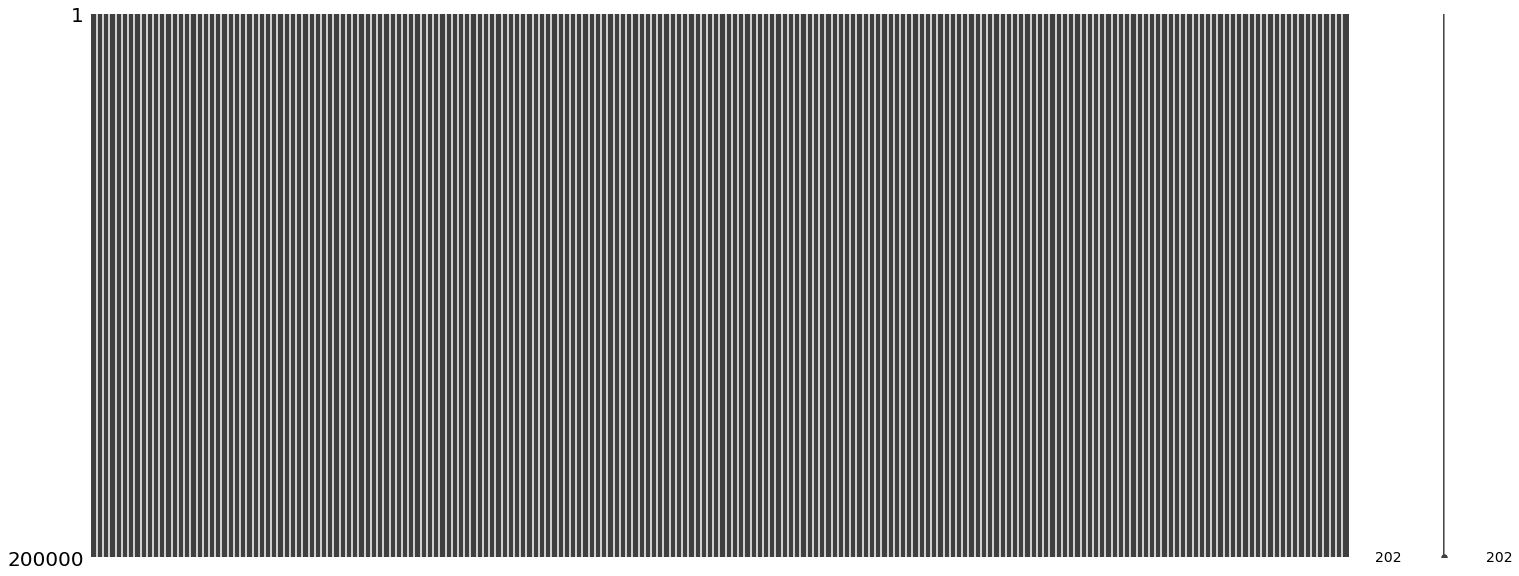

In [11]:
msno.matrix(train)

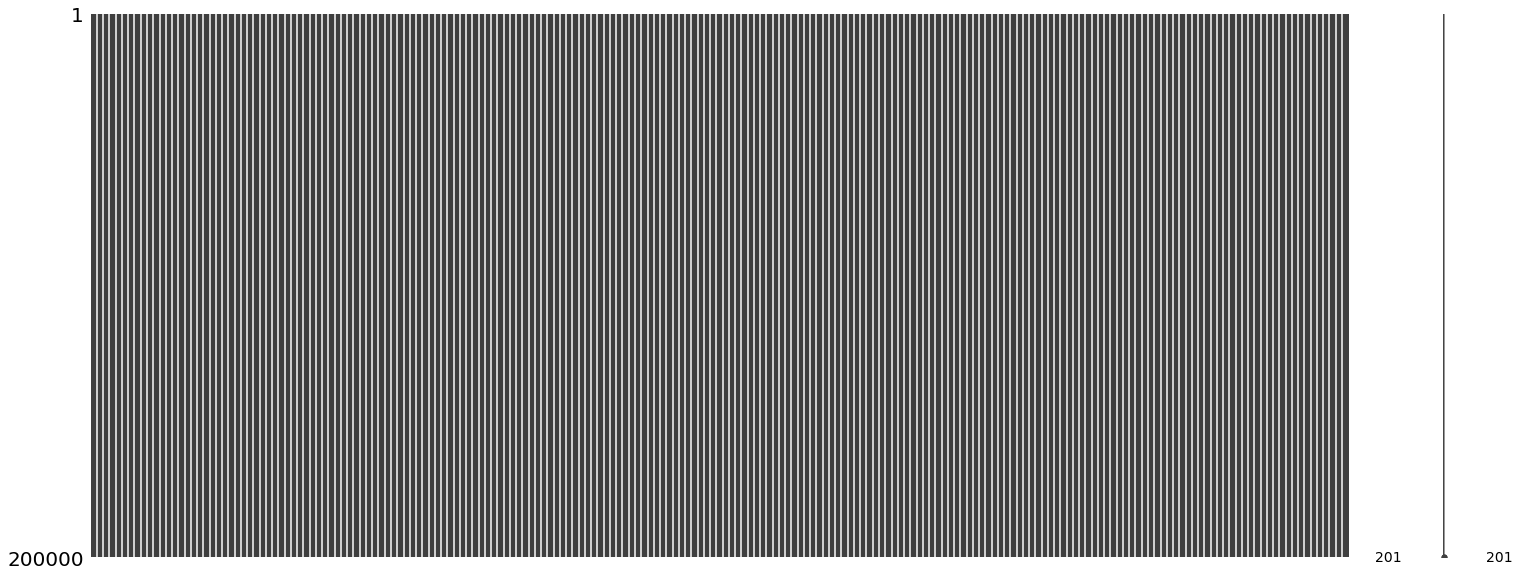

In [12]:
msno.matrix(test)

Датасет содержит 199 признаков. Даннные без пропусков. Они представляют из себя числовые признаки.  Так же и в тестовом и в тренировочном датасетах содержится по 200 000 наблюдений.

#### 2. Сделать базовый анализ целевой переменной, сделать выводы;

In [38]:
train["target"].value_counts()

0    179902
1     20098
Name: target, dtype: int64

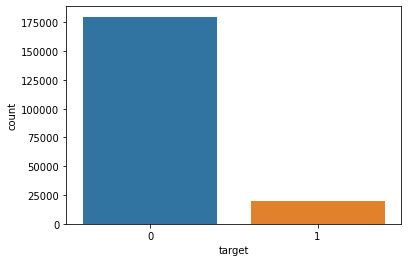

In [39]:
sns.countplot(train["target"]);

Целевая переменная не сбалансирована. Скорее всего для обучения портребуется балансировка классов.

In [15]:
numerical_features = train.select_dtypes(include=[np.number])
print(f"count of numeric_features {numerical_features.shape[1]}")

count of numeric_features 201


In [16]:
discrete_feature = [
    feature for feature in numerical_features
    if len(train[feature].unique())<25
]

print(f"Discrete Variables Count: {len(discrete_feature)}")

Discrete Variables Count: 1


In [17]:
discrete_feature

['target']

Так же среди признаков не содержится дискретных фичей, и все они являются неприрывными

In [32]:
continuous_feature = [
    feature for feature in numerical_features
    if feature not in ["target"]]

print(f"Continuous Feature Count {len(continuous_feature)}")

Continuous Feature Count 200


#### 3. Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы;

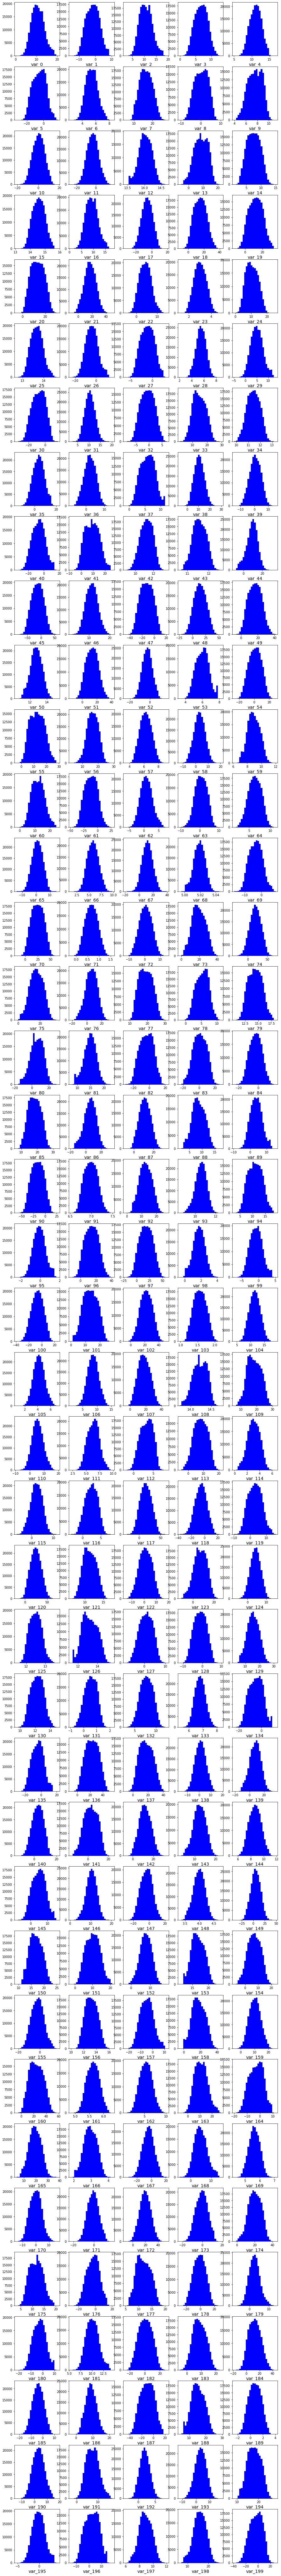

In [34]:
fig, axes = plt.subplots(40, 5, figsize=(15, 150))

for num, feature in enumerate(continuous_feature):
    data = train[feature].copy()
    axes[num//5, num%5].hist(data, bins=25, color="blue")
    axes[num//5, num%5].set_xlabel(feature, fontsize=14)

Видим, что распределения признаков нормальные.
У Var_108 есть выбросы.  

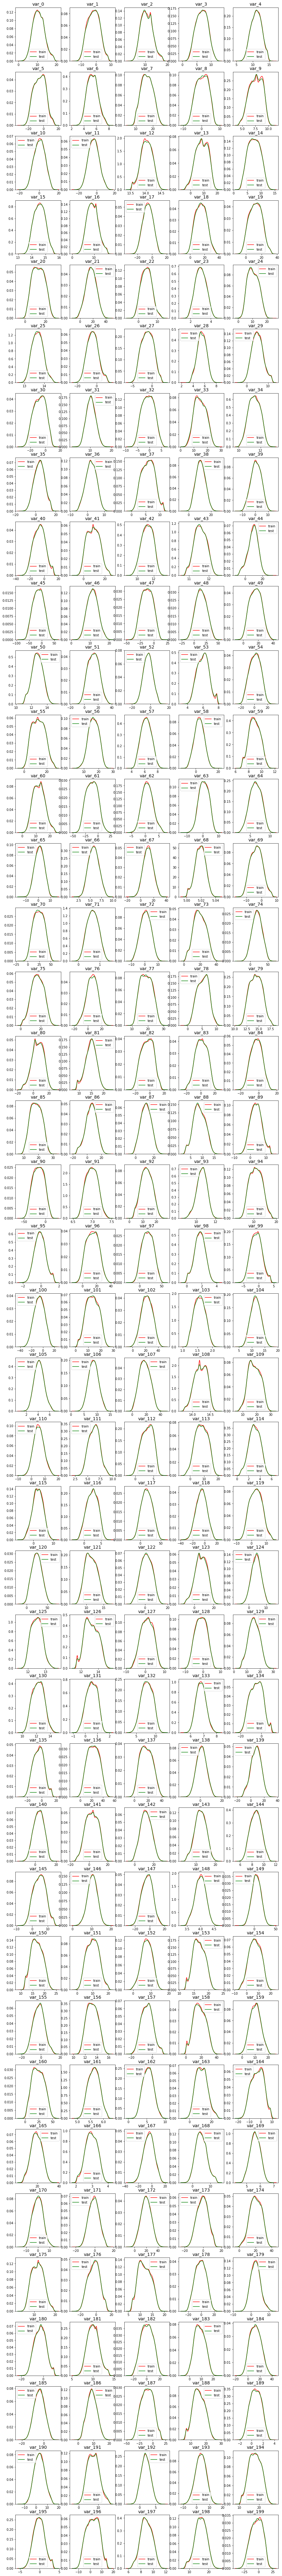

In [42]:
fig, axes = plt.subplots(40, 5, figsize=(15, 150))


for num, feature in enumerate(continuous_feature):
    try:
        data_0, data_1 = train[feature].loc[train['target'] == 0].copy(), test[feature].loc[train['target'] == 1].copy()
        sns.kdeplot(data_0, ax=axes[num//5, num%5], color="red", label="train")
        sns.kdeplot(data_1, ax=axes[num//5, num%5], color="green", label="test")
    except RuntimeError:
        pass
    except KeyError:
        train_data = train[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//5, num%5], color="blue", label="train")
    axes[num//5, num%5].set_title(feature, fontsize=14)

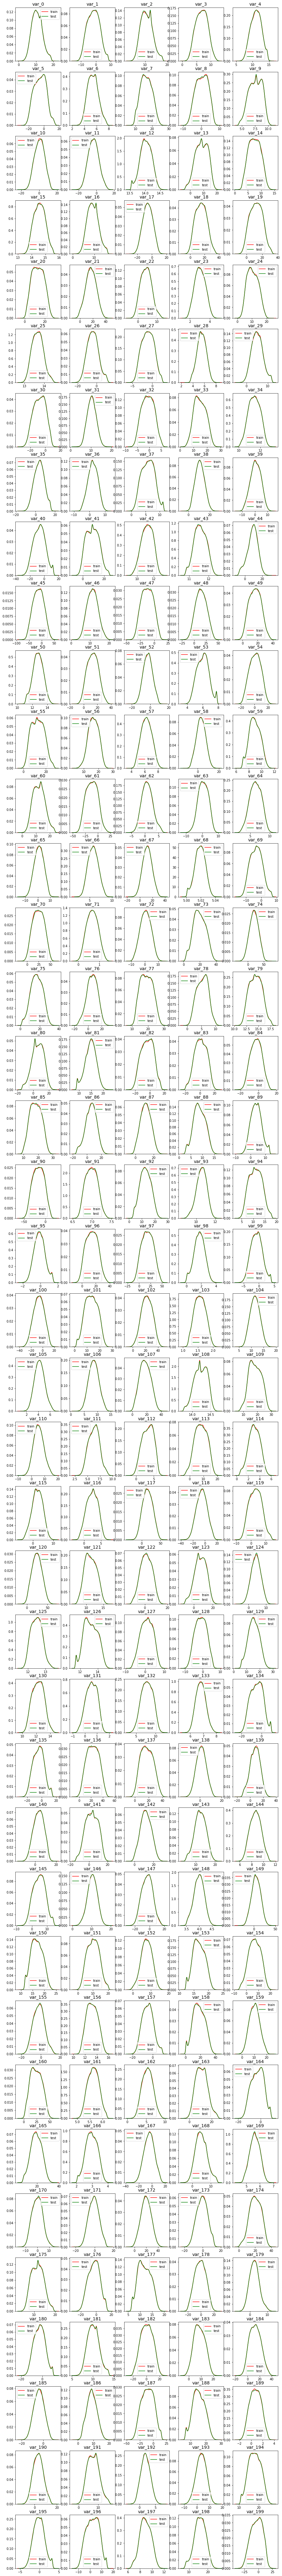

In [43]:
fig, axes = plt.subplots(40, 5, figsize=(15, 150))

for num, feature in enumerate(continuous_feature):
    try:
        train_data, test_data = train[feature].copy(), test[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//5, num%5], color="red", label="train")
        sns.kdeplot(test_data, ax=axes[num//5, num%5], color="green", label="test")
    except RuntimeError:
        pass
    except KeyError:
        train_data = train[feature].copy()
        sns.kdeplot(train_data, ax=axes[num//5, num%5], color="blue", label="train")
    axes[num//5, num%5].set_title(feature, fontsize=14)

и в тестовом и в тренировочном датасетах распределения признаков совпадают

Основные статистики по всем переменным совпадают для тестовой и тренировочной выборок

#### 4.Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы

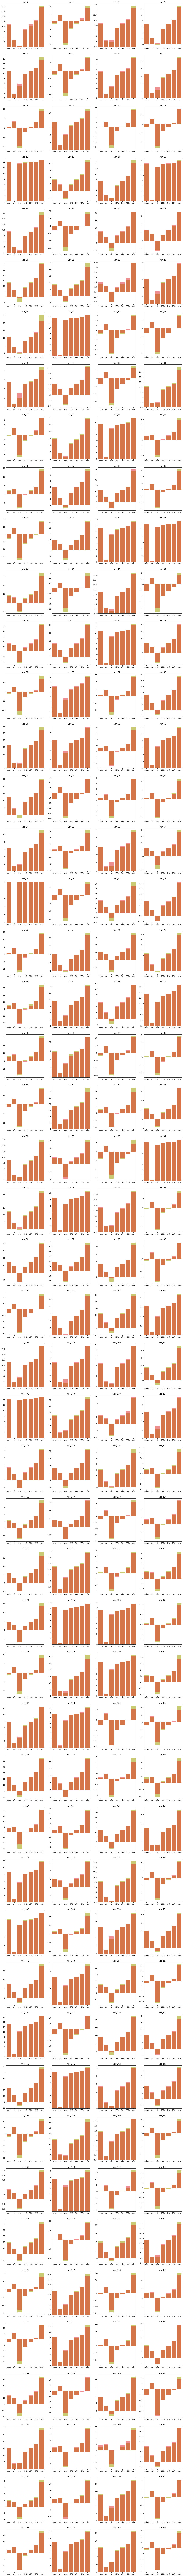

In [46]:
plt.figure(figsize=(20,300))

for num, feature in enumerate(continuous_feature):
    plt.subplot(50,4,num+1)
    plt.title(feature)
    
    train_stat_t0 = train.loc[train["target"] == 0, feature].describe().drop('count', axis=0)
    train_stat_t1 = train.loc[train["target"] == 1, feature].describe().drop('count', axis=0)
    
    sns.barplot(train_stat_t0.index, train_stat_t0.values, alpha=0.5, color='b')
    sns.barplot(train_stat_t1.index, train_stat_t1.values, alpha=0.4, color='r')
    
plt.show()

Различия между распределениями статистик признаков в разрезе целевой переменной незначительные.

Кроме того, на графике видно, что у признака var_68, маленькое среднее квадратичное отклонение.

#### 5. Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?

In [48]:
correlation = train.drop('ID_code', axis=1).corr()
corr_with_target = correlation["target"].sort_values(ascending = False)
corr_with_target[abs(corr_with_target) > 0.2]

target    1.0
Name: target, dtype: float64

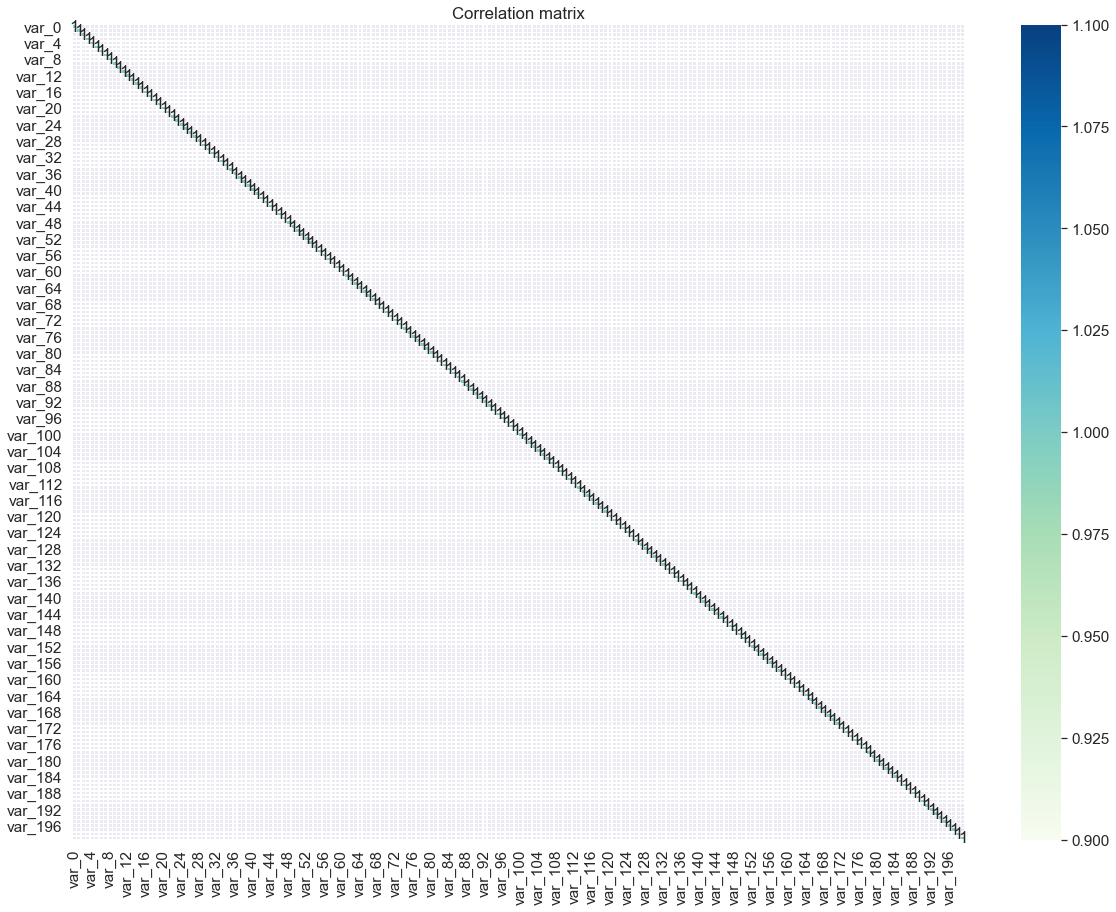

In [51]:
correlation = abs(train[continuous_feature].corr()) > 0.2

plt.figure(figsize=(20,15))

sns.set(font_scale=1.4)
sns.heatmap(train[continuous_feature].corr()[correlation], annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix')
plt.show()

#### 6. Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.

In [54]:
%%time
parameters = {"max_depth": 5, "n_estimators": 30, "random_state": 250, "n_jobs": 2}

forest = RandomForestRegressor(**parameters)
forest.fit(train[continuous_feature], train["target"])

Wall time: 3min 5s


RandomForestRegressor(max_depth=5, n_estimators=30, n_jobs=2, random_state=250)

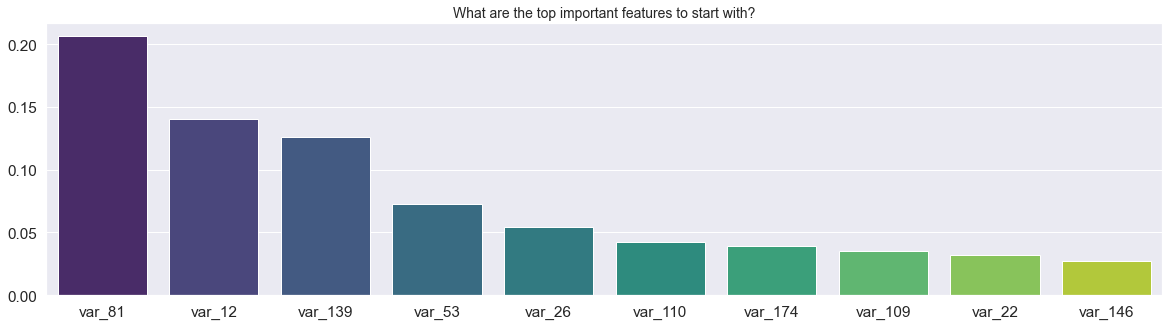

In [56]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = train[continuous_feature].columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14);

#### 7. Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.

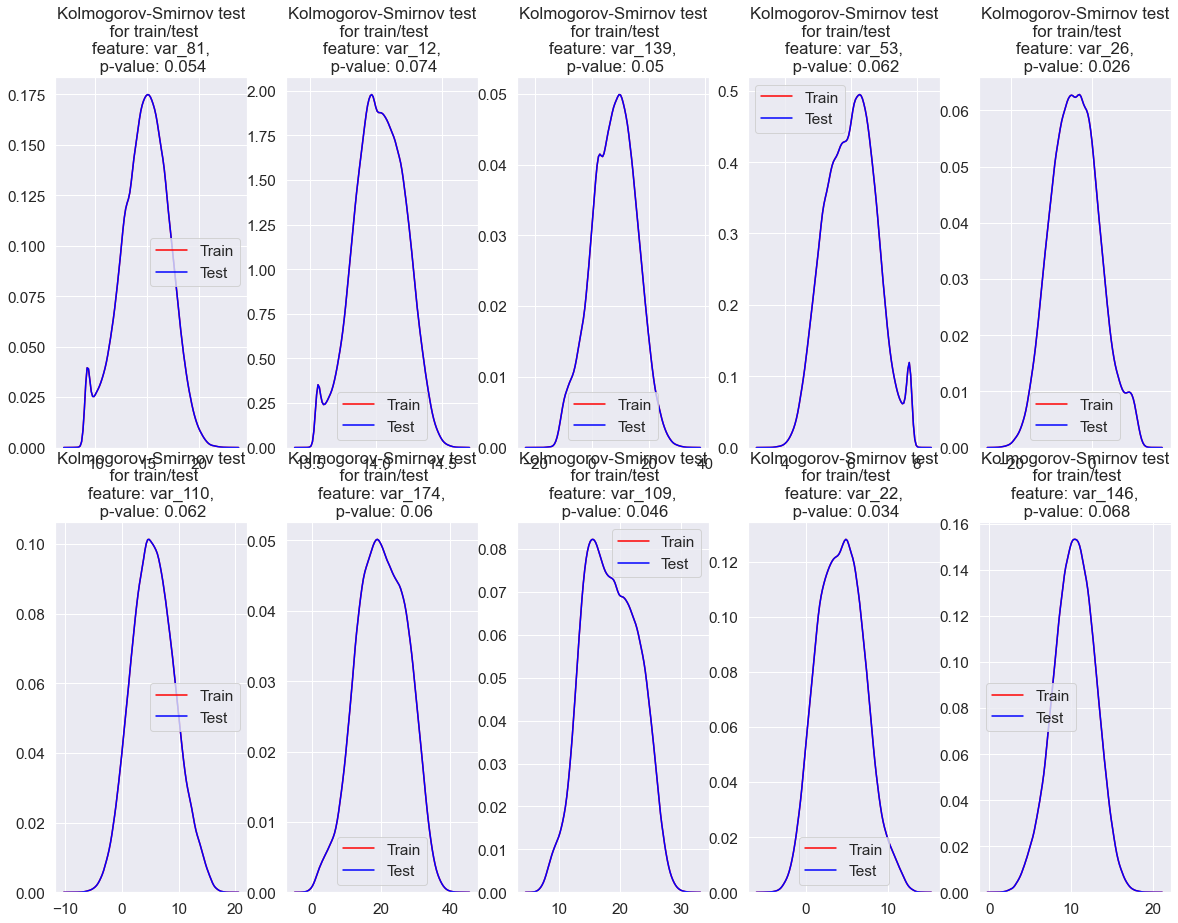

In [57]:
statistics_array = []
fig, axes = plt.subplots(2, 5, figsize=(20, 15))

for num, feature in enumerate(feature_names[idx]):
    statistic, pvalue = ks_2samp(
        train[feature].sample(500), test[feature].sample(500)
    )
    statistics_array.append(statistic)

    sns.kdeplot(train[feature], ax=axes[num//5, num%5], color="Red", label="Train")
    sns.kdeplot(train[feature], ax=axes[num//5, num%5], color="Blue", label="Test")

    axes[num//5, num%5].set_title(
        (f"Kolmogorov-Smirnov test\n for train/test\n"
        f"feature: {feature},\n p-value: {round(statistic, 3)}")
    )